## Exploratory Analysis of Stellar MLS Data of Residential Real-Estate Listings that closed in the month of April 2022

In this markdown I will be practicing some basic data cleaning with the pandas package, and visual presentations with mayplotlib.

In [29]:
import re
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [ ]:
### 

In [ ]:
df = pd.read_csv("Houses.csv")
df = df.rename(columns={'On Market Date': "List_Date", "Close Date": "Close_Date", "Close Price": "Close_Price", "Original List Price": "Original_List_Price"})
print(df.columns)

# df["diff"] = df.apply(lambda row: row.Close_Price - row.Original_List_Price, axis = 1)

### Notes for code below

NOTE 1: This replaces with Series.str.replace https://stackoverflow.com/questions/22588316/pandas-applying-regex-to-replace-values

https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/



In [61]:
# Column Cloze_Price is an obj file, here we convert it to a string.
df["Close_Price"] = df["Close_Price"].astype('string')
# We need to remove characters from the price (e.g., $400,000 to 400000), we use str.replace function
df['Close_Price'] = df['Close_Price'].str.replace(r'\D+', '', regex=True).astype('int') # NOTE 1

# Same as above but for Column Original_List_Price
df["Original_List_Price"] = df["Original_List_Price"].astype('string')
# Same as above but for Column Original_List_Price
df['Original_List_Price'] = df['Original_List_Price'].str.replace(r'\D+', '', regex=True).astype('int')

df.dtypes

#                                 int64
ML Number                        object
Close_Price                       int32
Original_List_Price               int32
List_Date                        object
Close_Date                       object
Status                           object
Address                          object
City                             object
Zip                               int64
Legal Subdivision Name           object
Heated Area                      object
Current Price                    object
Beds                              int64
Full Baths                        int64
Half Baths                        int64
Year Built                      float64
Pool                             object
Property Style                   object
Tax                              object
CDOM                              int64
ADOM                              int64
Days to Contract                  int64
Sold Terms                       object
LP / SqFt                        object


In [58]:
median_Original = df["Original_List_Price"].median() 

# create a list of our conditions
conditions = [ 
    (df["Original_List_Price"] <= median_Original),
    (df["Original_List_Price"] > median_Original)
]

# create a list of the values we want to assign for each condition
values = ['Lower_Median', 'Higher_Median']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Median_OP'] = np.select(conditions, values)


df["diff"] = df.apply(lambda row: row.Close_Price - row.Original_List_Price, axis = 1)

# print(df.dtypes)
df.head(10)


,#,ML Number,Close_Price,Original_List_Price,List_Date,Close_Date,Status,Address,City,Zip,...,SP / LP,List Office,List Agent,List Agent ID,Selling Office ID,Selling Agent ID,LSC List Side,List Office Primary Board ID,diff,Median_OP
0,1,O5964340,2530000,3500000,08/19/2021,04/01/2022,SLD,8200 FIRENZE BLVD,ORLANDO,32836,...,0.87,"LA ROSA REALTY, LLC",Patricia Cordero Lopez,261218652,56563,261218652,Orlando Regional,Osceola,-970000,Higher_Median
1,1,O5962884,3399000,3495000,08/02/2021,04/07/2022,SLD,9131 SOUTHERN BREEZE DR,ORLANDO,32836,...,1.00,PREMIER BROKERS INTERNATIONAL,Lee Yi,261094066,54935,261220680,Orlando Regional,Orlando Regional,-96000,Higher_Median
2,1,O6008003,3200000,3400000,03/04/2022,04/05/2022,SLD,8998 HUBBARD PL,ORLANDO,32819,...,0.94,ENGEL & VOLKERS,"Russ Wasendorf, Jr",261230694,261010674,249518241,Orlando Regional,Lake and Sumter,-200000,Higher_Median
3,1,O6001539,2300000,2900000,02/07/2022,04/21/2022,SLD,8028 FIRENZE BLVD,ORLANDO,32836,...,0.92,PREMIER SOTHEBYS INT'L REALTY,Gordon Kyle,272505934,261018632,732014520,Orlando Regional,Orlando Regional,-600000,Higher_Median
4,1,O5940273,1890000,2495000,05/01/2021,04/08/2022,SLD,705 DELANEY AVE,ORLANDO,32801,...,0.95,KELLER WILLIAMS REALTY AT THE PARKS,Katherine Kinchla,261067550,282019386,282011210,Orlando Regional,Orlando Regional,-605000,Higher_Median
5,1,O6008699,1800000,1799950,03/11/2022,04/19/2022,SLD,80 WAVERLY PL,ORLANDO,32806,...,1.00,CHARLES RUTENBERG REALTY ORLANDO,Jose Ole Mussenden,272505315,52365,261221959,Orlando Regional,Orlando Regional,50,Higher_Median
6,1,O6009765,1687500,1750000,03/10/2022,04/20/2022,SLD,1366 HARBOUR ISLAND RD,ORLANDO,32809,...,0.96,HOMEVEST REALTY,Brad Young,261203816,261016915,261214116,Orlando Regional,Orlando Regional,-62500,Higher_Median
7,1,O6011001,1550000,1550000,03/18/2022,04/21/2022,SLD,13000 ROMILEY CT,ORLANDO,32832,...,1.00,CHARLES RUTENBERG REALTY ORLANDO,"Raju Abraham, PA",261082463,261013159,261210310,Orlando Regional,Orlando Regional,0,Higher_Median
8,1,O5999908,1400000,1549000,02/03/2022,04/07/2022,SLD,5712 CRESCENT HEIGHTS RIDGE,ORLANDO,32819,...,0.90,PREMIER SOTHEBY'S INTL. REALTY,"Keith Conklin, LLC",261223007,260506146,260504237,Orlando Regional,Orlando Regional,-149000,Higher_Median
9,1,O6000373,1250000,1450000,02/03/2022,04/01/2022,SLD,8435 AMBER OAK DR,ORLANDO,32817,...,0.90,EXP REALTY LLC,Scott Rhodes,261070358,261011096,261083323,Orlando Regional,Orlando Regional,-200000,Higher_Median


In [57]:
df["Close_Price"].median()

299500.0

TypeError: list indices must be integers or slices, not str

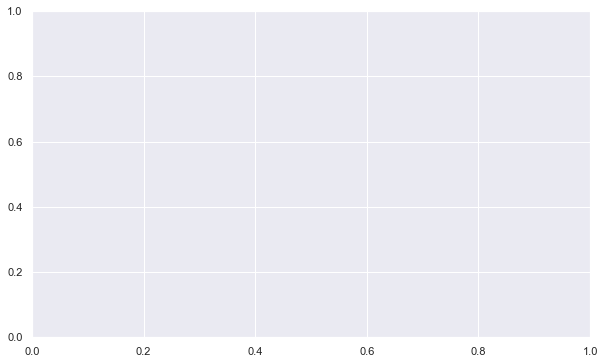

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Close_Price'], df['Original_List_Price'])
ax.set_xlabel('Close Price')
ax.set_ylabel('Listing Price')
plt.show()

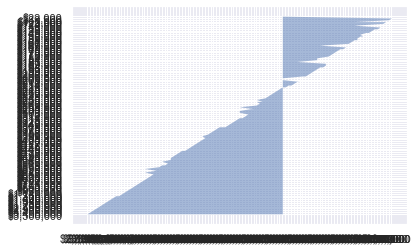

In [8]:
fig, ax = plt.subplots()
ax.fill_between(df['Close_Price'], df['Original_List_Price'], alpha=.5, linewidth=0)
plt.show()